<a href="https://colab.research.google.com/github/eddy123457/SVC_Heatmap_PCA/blob/main/ML8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

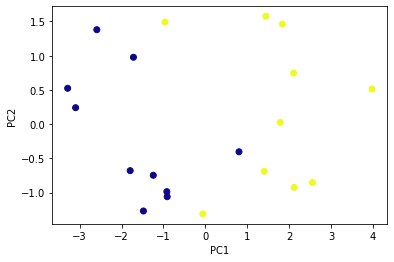

here [[-0.44132818 -0.43963913  0.40949707  0.38455003  0.37454193 -0.23869615
   0.31483772  0.        ]
 [-0.05736509  0.03857832 -0.3042089   0.28176326  0.15760043  0.78276975
   0.43095358 -0.        ]]
0.4413281755849198 0
-0.4396391339914124 1
0.7827697517156712 5
-0.0 7
Data:  0     55
1     47
2     47
3     45
4     50
5     55
6     54
7     47
8     50
9     50
10    39
11    42
12    34
13    39
14    38
15    42
16    36
17    38
18    36
19    34
Name: Flour, dtype: int64


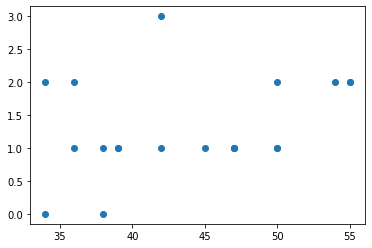

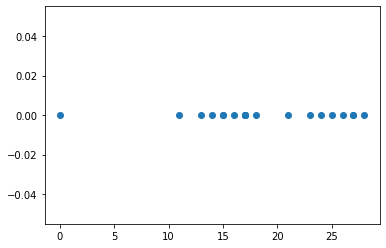

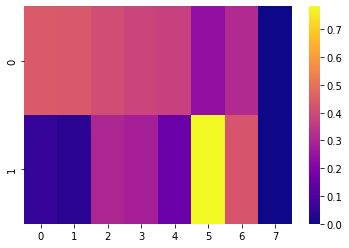

Variance:  [0.58735266 0.13949782]


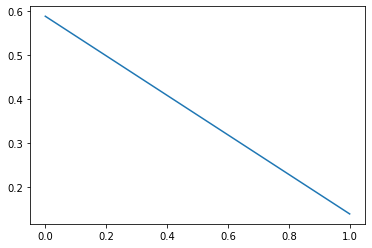

(20, 9)
Model accuracy score:  1.0
Coefficients:  [[-0.23069712  0.07721151]]
Intercept:  [3.99687526]
Prediction:  [1 1 1 1 1]
Predicted Results

	 [0 5] 	 1
	 [ 0 20] 	 1
	 [ 0 15] 	 1
	 [6 0] 	 1
	 [ 5 50] 	 1
[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


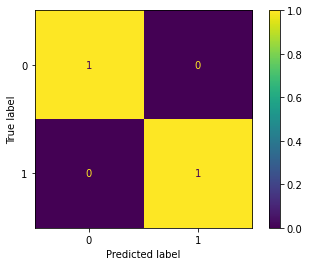

In [4]:


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from mpl_toolkits import mplot3d
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

recipes = pd.read_csv('recipes_muffins_cupcakes.csv')


X = recipes.drop('Type', axis=1)
yy = recipes.Type
y=[]
for c in range(len(yy)):
    if (yy[c] == 'Cupcake'):
        y.append(1)
    elif (yy[c] == 'Muffin'):
        y.append(0)
    else:
        y.append(2)


scaler = StandardScaler()
scaler.fit(X)

scaled_data = scaler.transform(X)


pca = PCA(n_components=2)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print('here',pca.components_)


PC1max = abs(pca.components_[0, 0])
PC1maxIndex = 0
PC1min = abs(pca.components_[0, 0])
PC1minIndex = 0


PC2max = abs(pca.components_[1, 0])
PC2maxIndex = 0
PC2min = abs(pca.components_[1, 0])
PC2minIndex = 0

for c in range(pca.components_.shape[1]):
    if (abs(pca.components_[0, c]) > PC1max):
        PC1max = pca.components_[0, c]
        PC1maxIndex = c

for c in range(pca.components_.shape[1]):
    if (abs(pca.components_[0, c]) < PC1min):
        PC1min = pca.components_[0, c]
        PC1minIndex = c



for c in range(pca.components_.shape[1]):
    if (abs(pca.components_[1, c]) > PC2max):
        PC2max = pca.components_[1, c]
        PC2maxIndex = c

for c in range(pca.components_.shape[1]):
    if (abs(pca.components_[1, c]) < PC2min):
        PC2min = pca.components_[1, c]
        PC2minIndex = c

print(PC1max, PC1maxIndex)
print(PC1min, PC1minIndex)

print(PC2max, PC2maxIndex)
print(PC2min, PC2minIndex)

print('Data: ', X.iloc[:, PC1maxIndex])
plt.scatter(X.iloc[:, PC1maxIndex], X.iloc[:, PC2maxIndex])
plt.show()


plt.scatter(X.iloc[:, PC1minIndex], X.iloc[:, PC2minIndex])
plt.show()

df_comp = abs(pd.DataFrame(pca.components_))

#plt.figure(figsize=(30, 30))
sns.heatmap(df_comp, cmap='plasma')
plt.show()
print('Variance: ', pca.explained_variance_ratio_)

plt.plot(pca.explained_variance_ratio_)

plt.show()


recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
print(recipes.shape)

XX = recipes.drop('Type', axis=1)
XX = recipes[['Milk','Egg']]


X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.10)

model = SVC(kernel='linear', decision_function_shape='ovo')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Model accuracy score: ', accuracy_score(y_test, y_pred))


print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)

DataToPredict = np.array([[0, 5], [0, 20], [0, 15], [6, 0], [5, 50]])
pred = model.predict(DataToPredict)

print("Prediction: ", pred)

print('Predicted Results\n')
for i in range(len(pred)):
    print('\t', DataToPredict[i], '\t', pred[i])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)
plt.show()



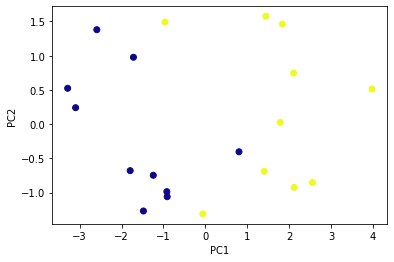

here [[-0.44132818 -0.43963913  0.40949707  0.38455003  0.37454193 -0.23869615
   0.31483772  0.        ]
 [-0.05736509  0.03857832 -0.3042089   0.28176326  0.15760043  0.78276975
   0.43095358 -0.        ]]
0.4413281755849198 0
-0.4396391339914124 1
0.7827697517156712 5
-0.0 7
Data:  0     55
1     47
2     47
3     45
4     50
5     55
6     54
7     47
8     50
9     50
10    39
11    42
12    34
13    39
14    38
15    42
16    36
17    38
18    36
19    34
Name: Flour, dtype: int64


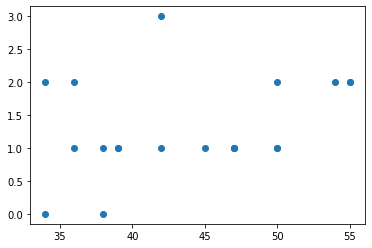

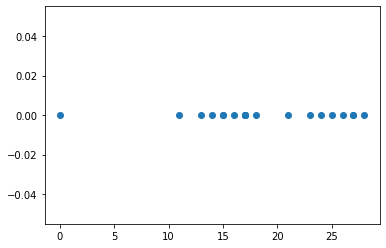

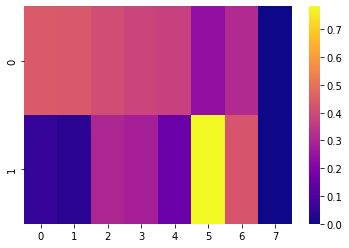

Variance:  [0.58735266 0.13949782]


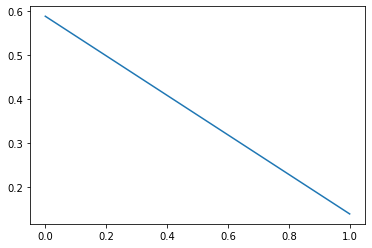

(20, 9)
Prediction:  [1 1 1 1 1]
Predicted Results

	 [0 5] 	 1
	 [ 0 20] 	 1
	 [ 0 15] 	 1
	 [6 0] 	 1
	 [ 5 50] 	 1


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Baking Powder
- Flour
Feature names seen at fit time, yet now missing:
- Egg
- Milk

  warnings.warn(message, FutureWarning)


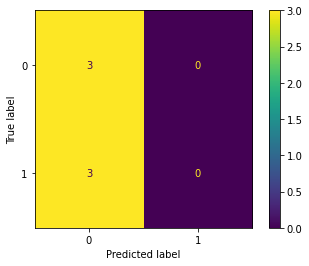

[1 1 1 1 1]


In [7]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from mpl_toolkits import mplot3d
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


recipes = pd.read_csv('recipes_muffins_cupcakes.csv')


X = recipes.drop('Type', axis=1)
yy = recipes.Type
y=[]
for c in range(len(yy)):
    if (yy[c] == 'Cupcake'):
        y.append(1)
    elif (yy[c] == 'Muffin'):
        y.append(0)


scaler = StandardScaler()
scaler.fit(X)

scaled_data = scaler.transform(X)


pca = PCA(n_components=2)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print('here',pca.components_)


PC1max = abs(pca.components_[0, 0])
PC1maxIndex = 0
PC1min = abs(pca.components_[0, 0])
PC1minIndex = 0


PC2max = abs(pca.components_[1, 0])
PC2maxIndex = 0
PC2min = abs(pca.components_[1, 0])
PC2minIndex = 0

for c in range(pca.components_.shape[1]):
    if (abs(pca.components_[0, c]) > PC1max):
        PC1max = pca.components_[0, c]
        PC1maxIndex = c

for c in range(pca.components_.shape[1]):
    if (abs(pca.components_[0, c]) < PC1min):
        PC1min = pca.components_[0, c]
        PC1minIndex = c



for c in range(pca.components_.shape[1]):
    if (abs(pca.components_[1, c]) > PC2max):
        PC2max = pca.components_[1, c]
        PC2maxIndex = c

for c in range(pca.components_.shape[1]):
    if (abs(pca.components_[1, c]) < PC2min):
        PC2min = pca.components_[1, c]
        PC2minIndex = c

print(PC1max, PC1maxIndex)
print(PC1min, PC1minIndex)

print(PC2max, PC2maxIndex)
print(PC2min, PC2minIndex)

print('Data: ', X.iloc[:, PC1maxIndex])
plt.scatter(X.iloc[:, PC1maxIndex], X.iloc[:, PC2maxIndex])
plt.show()


plt.scatter(X.iloc[:, PC1minIndex], X.iloc[:, PC2minIndex])
plt.show()

df_comp = abs(pd.DataFrame(pca.components_))

#plt.figure(figsize=(30, 30))
sns.heatmap(df_comp, cmap='plasma')
plt.show()
print('Variance: ', pca.explained_variance_ratio_)

plt.plot(pca.explained_variance_ratio_)

plt.show()

print(recipes.shape)

XX = recipes.drop('Type', axis=1)
XX = recipes[['Flour','Baking Powder']]
yy = recipes.Type
yt=[]
for c in range(len(yy)):
    if (yy[c] == 'Cupcake'):
        yt.append(1)
    elif (yy[c] == 'Muffin'):
        yt.append(0)
    

X_train, X_test, y_train, y_test = train_test_split(XX, yt, test_size=0.3)

dtree=DecisionTreeClassifier()

dtree.fit(X_train, y_train)

test=np.array([[0, 5], [0, 20], [0, 15], [6, 0], [5, 50]])

predictions = dtree.predict([[0, 5], [0, 20], [0, 15], [6, 0], [5, 50]])


print("Prediction: ", predictions)

print('Predicted Results\n')
for i in range(len(pred)):
    print('\t', DataToPredict[i], '\t', predictions[i])



plot_confusion_matrix(model, X_test, y_test)
plt.show()
print(predictions)

